In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from scipy.signal import convolve2d
import cv2

2024-05-29 11:56:01.401331: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 11:56:01.404596: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 11:56:01.455180: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 11:56:02.327460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#load image and display and return image array
def imgToArr(imgPath:str,title:str,width:int,height:int):
    # Loading the image
    img=load_img(imgPath, target_size=(width, height))
    imgArray=img_to_array(img)/255.0
    # Display the cropped image
    plt.imshow(imgArray)
    plt.title(title)
    plt.xlabel("width (linear scale)")
    plt.ylabel("height (linear scale)")
    plt.show()
    return imgArray

In [3]:
def rgbToGray(imgArr:np.array,title:str):
    #convert into grayscale
    imgArrGray = cv2.cvtColor((imgArr * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    imgArrGray = imgArrGray / 255.0
    #displaying grayscale image
    plt.imshow(imgArrGray)
    plt.title(title)
    plt.xlabel("width (linear scale)")
    plt.ylabel("height (linear scale)") 
    plt.show()
    return imgArrGray

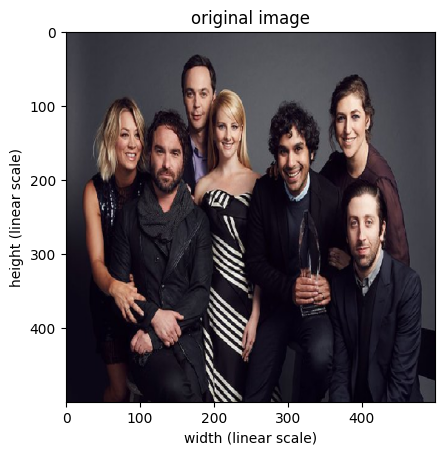

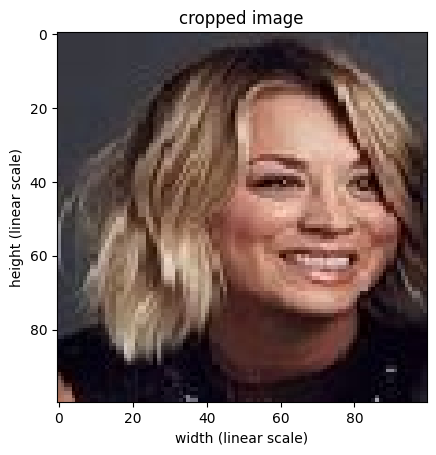

In [4]:
#load image
orgImg=imgToArr("BBT.jpeg","original image",500,500)
croppedImg=imgToArr("Penny.jpeg","cropped image",100,100)

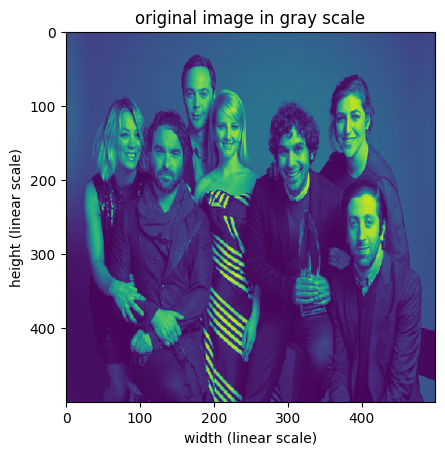

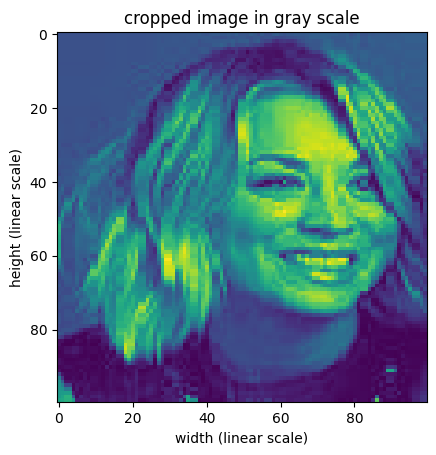

In [5]:
#change image to grayscale
orgImgGray=rgbToGray(orgImg,"original image in gray scale")
croppedImgGray=rgbToGray(croppedImg,"cropped image in gray scale")

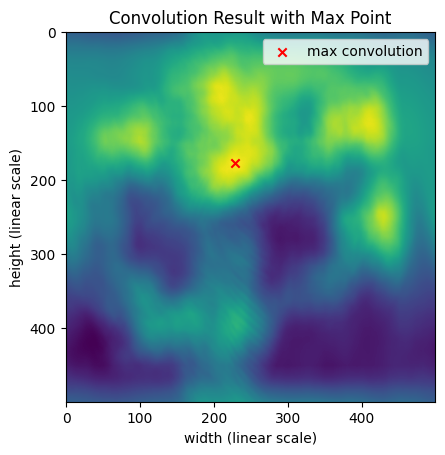

In [6]:
# Perform convolution using scipy.signal.convolve2d
convolutionResult = convolve2d(orgImgGray, croppedImgGray, mode='same', boundary='wrap')
# finding max convolution 
maxCoords = np.unravel_index(np.argmax(convolutionResult), convolutionResult.shape)
# Display the convolution result
plt.imshow(convolutionResult)
# marking the max point
plt.scatter(maxCoords[1], maxCoords[0], color='red', marker='x',label="max convolution")
plt.title("Convolution Result with Max Point")
plt.xlabel("width (linear scale)")
plt.ylabel("height (linear scale)") 
plt.legend()
plt.show()
